In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
[0, 17, 33, 67, 134, 267, 533] # time in ms
[0, 1, 2, 4, 8, 16, 32] # frames in 60 FPS 
[0, 2, 4, 8, 16, 32, 64] # frames in 120 FPS 

[0, 2, 4, 8, 16, 32, 64]

### 1s mean on, 0s mean off

In [3]:
## in ms
durations = [0, 17, 33, 67, 134, 267, 533]
fixed_duration = 134
total_duration = 800 # (<800 ms in total) in exp design
var_duration = np.vstack([np.hstack((np.ones(duration), np.zeros(total_duration - duration))) for duration in durations])
var_isi = np.vstack([np.hstack((np.ones(fixed_duration), np.zeros(duration), np.ones(fixed_duration), np.zeros(total_duration- duration - 2*fixed_duration))) for duration in durations])

ValueError: negative dimensions are not allowed

In [4]:
## in frames
durations = [0, 2, 4, 8, 16, 32, 64] # frames in 120 FPS 
fixed_duration = 16
total_duration = 96 # (<800 ms in total) in exp design; 800 ms = .8*120 = 96 frames
var_duration = np.vstack([np.hstack((np.ones(duration), np.zeros(total_duration - duration))) for duration in durations])
var_isi = np.vstack([np.hstack((np.ones(fixed_duration), np.zeros(duration), np.ones(fixed_duration), np.zeros(total_duration- duration - 2*fixed_duration))) for duration in durations])

In [4]:
for i in range(6):
    print(1/120 * 2 * 2**i, 2**i)

0.016666666666666666 1
0.03333333333333333 2
0.06666666666666667 4
0.13333333333333333 8
0.26666666666666666 16
0.5333333333333333 32


### 1s mean flip()

In [5]:
## in frames
durations = [0, 2, 4, 8, 16, 32, 64] # frames in 120 FPS 
fixed_duration = 16
total_duration = 96 # (<800 ms in total) in exp design; 800 ms = .8*120 = 96 frames


96.0

In [41]:
var_duration_flip = np.zeros((len(durations), total_duration))
for i in range(len(durations)):
    #print(i)
    var_duration_flip[i, 0] = 1
    var_duration_flip[i, durations[i]] = 1
    
    if i == 0:
        var_duration_flip[i, 0] = 0
 
var_isi_flip = np.zeros((len(durations), total_duration))
#var_duration_flip

for i in range(len(durations)):
    #print(i)
    
    if i == 0:
        var_isi_flip[i, 0] = 1
        var_isi_flip[i, 2 * fixed_duration] = 1
        
    else:
        try:
            # fixed 16 frames
            var_isi_flip[i, 0] = 1
            var_isi_flip[i, 0 + fixed_duration] = 1
            var_isi_flip[i, 0 + fixed_duration + durations[i]] = 1
            var_isi_flip[i, 0 + fixed_duration + durations[i] + fixed_duration] = 1
        except IndexError:
            continue
        
var_isi_flip

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [44]:
for row in var_isi_flip:
    print(np.where(row == 1)[0])

[ 0 32]
[ 0 16 18 34]
[ 0 16 20 36]
[ 0 16 24 40]
[ 0 16 32 48]
[ 0 16 48 64]
[ 0 16 80]


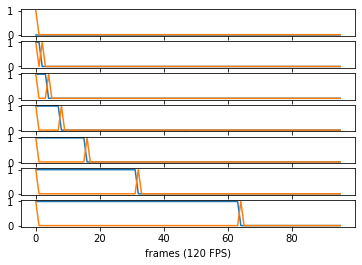

In [27]:
fig, axs = plt.subplots(len(var_duration), 1)

for i, ax in enumerate(axs):
    ax.plot(var_duration[i], label = 'stimulus')
    ax.plot(var_duration_flip[i], label = 'stimulus')
    
    ax.set_xlabel('frames (120 FPS)')

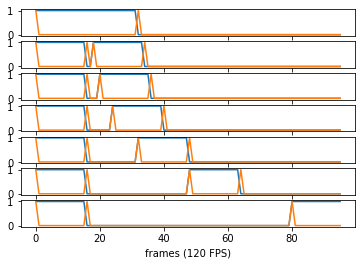

In [42]:
fix, axs = plt.subplots(len(var_isi), 1)
for i, ax in enumerate(axs):
    ax.plot(var_isi[i], label = 'stimulus')
    ax.plot(var_isi_flip[i], label = 'stimulus')
    
    ax.set_xlabel('frames (120 FPS)')

In [8]:
var_isi

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [13]:
for trial_nr in range(10):
    dic = dict(trial_type='dur' if trial_nr % 2 == 0 else 'isi', stim_dur = durations[trial_nr%len(durations)])
    print(dic)

{'trial_type': 'dur', 'stim_dur': 0}
{'trial_type': 'isi', 'stim_dur': 2}
{'trial_type': 'dur', 'stim_dur': 4}
{'trial_type': 'isi', 'stim_dur': 8}
{'trial_type': 'dur', 'stim_dur': 16}
{'trial_type': 'isi', 'stim_dur': 32}
{'trial_type': 'dur', 'stim_dur': 64}
{'trial_type': 'isi', 'stim_dur': 0}
{'trial_type': 'dur', 'stim_dur': 2}
{'trial_type': 'isi', 'stim_dur': 4}


In [20]:
# these dicts are integer indexable with the number of frames 
var_isi_dict = {dur:frames for dur, frames in zip(durations, var_isi)}
var_dur_dict = {dur:frames for dur, frames in zip(durations, var_duration)}


{0: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 2: array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 4: array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [23]:
[f'./textures/oneOverF_texture_1_1024_{i%10}' for i in range(15)]

['./textures/oneOverF_texture_1_1024_0',
 './textures/oneOverF_texture_1_1024_1',
 './textures/oneOverF_texture_1_1024_2',
 './textures/oneOverF_texture_1_1024_3',
 './textures/oneOverF_texture_1_1024_4',
 './textures/oneOverF_texture_1_1024_5',
 './textures/oneOverF_texture_1_1024_6',
 './textures/oneOverF_texture_1_1024_7',
 './textures/oneOverF_texture_1_1024_8',
 './textures/oneOverF_texture_1_1024_9',
 './textures/oneOverF_texture_1_1024_0',
 './textures/oneOverF_texture_1_1024_1',
 './textures/oneOverF_texture_1_1024_2',
 './textures/oneOverF_texture_1_1024_3',
 './textures/oneOverF_texture_1_1024_4']

In [27]:
import os
list(os.walk('./textures'))

[('./textures',
  [],
  ['oneOverF_texture_1_1024_6.bmp',
   'oneOverF_texture_1_1024_8.bmp',
   'oneOverF_texture_1_1024_5.bmp',
   'oneOverF_texture_1_1024_0.bmp',
   'oneOverF_texture_1_1024_2.bmp',
   'oneOverF_texture_1_1024_1.bmp',
   'oneOverF_texture_1_1024_9.bmp',
   'oneOverF_texture_1_1024_7.bmp',
   'oneOverF_texture_1_1024_3.bmp',
   'oneOverF_texture_1_1024_4.bmp'])]

In [31]:
import glob

file_paths = glob.glob('./textures/*')
file_paths

['./textures/oneOverF_texture_1_1024_6.bmp',
 './textures/oneOverF_texture_1_1024_8.bmp',
 './textures/oneOverF_texture_1_1024_5.bmp',
 './textures/oneOverF_texture_1_1024_0.bmp',
 './textures/oneOverF_texture_1_1024_2.bmp',
 './textures/oneOverF_texture_1_1024_1.bmp',
 './textures/oneOverF_texture_1_1024_9.bmp',
 './textures/oneOverF_texture_1_1024_7.bmp',
 './textures/oneOverF_texture_1_1024_3.bmp',
 './textures/oneOverF_texture_1_1024_4.bmp']

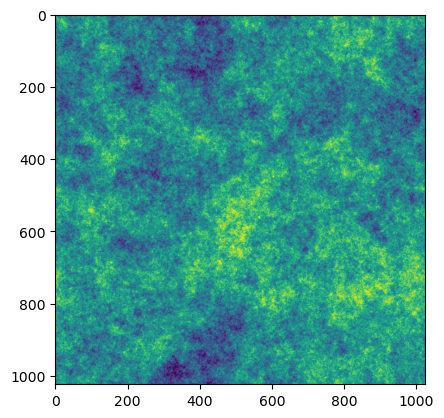

In [32]:
from PIL import Image

# Load the image using Pillow
image_path = file_paths[0]  # Replace this with the path to your image file
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)
plt.imshow(image_array)